# Introduction
The purpose of this notebook is to analyze the summary of grocery sales using simple function in Pandas & visualize it using seaborn.

# Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [131]:
df = pd.read_csv('/content/drive/MyDrive/Data/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [85]:
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


# Data Manipulation

In [87]:
df.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

As we see, there is only one data unique for the State. This indicate, the data just made by Tamil Nadu State, so we'll drop the column.

In [120]:
df.drop('State', axis = 1, inplace = True)

In [121]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1619
North         1
Name: Region, dtype: int64

As we see, there is only one data North in column Region, this might be indicate, it is added by mistake, so we'll drop the row

In [122]:
df.drop((df[df['Region'] == 'North']). index, inplace = True)

We'll make column Year from the order date 

In [123]:
order_year = df['Order Date'].str[-4:]
df.insert(6,'Order Year', order_year)

In [124]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Order Year,Region,Sales,Discount,Profit
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,2017,South,749,0.18,149.80
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,2017,West,2360,0.21,165.20
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,2016,South,896,0.25,89.60
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,2016,South,2355,0.26,918.45
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,2015,West,2305,0.26,322.70


# Total Sales by Region

In [48]:
region = df.pivot_table(index = 'Region', values = 'Sales', aggfunc = 'sum').reset_index().sort_values(by = 'Sales', ascending = False)
region

,Region,Sales
3,West,4798743
1,East,4248368
0,Central,3468156
2,South,2440461


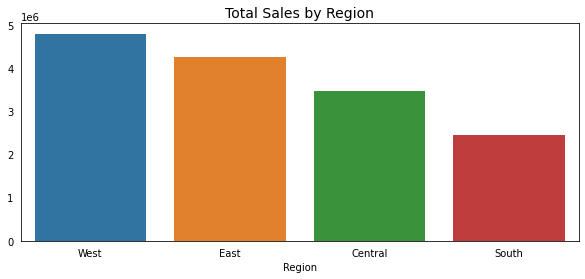

In [59]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (10,4)

# plotting the bar
sns.barplot(x = 'Region', y = 'Sales', data = region)

# formatting the graph
plt.title('Total Sales by Region', fontsize = 14)
plt.tick_params(left= False, bottom = False, labelbottom = True)
plt.ylabel(None)

plt.show()

# Total Sales by Category & Sub Category

In [66]:
category = df.pivot_table(index = ['Category', 'Sub Category'], values = 'Sales', 
                          aggfunc = 'sum').reset_index().sort_values(by = 'Sales', ascending = 'False')
category

,Category,Sub Category,Sales
12,Food Grains,Rice,498323
15,Fruits & Veggies,Organic Fruits,503402
16,Fruits & Veggies,Organic Vegetables,520271
5,"Eggs, Meat & Fish",Chicken,520497
10,Food Grains,Dals & Pulses,523371
14,Fruits & Veggies,Fresh Vegetables,525842
9,Food Grains,Atta & Flour,534649
13,Fruits & Veggies,Fresh Fruits,551212
11,Food Grains,Organic Staples,558929
7,"Eggs, Meat & Fish",Fish,560548


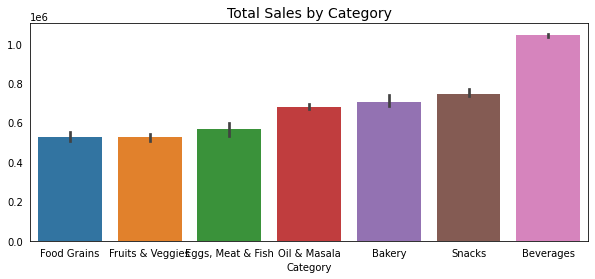

In [70]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (10,4)

# plotting the bar
sns.barplot(x = 'Category', y = 'Sales', data = category)

# formatting the graph
plt.title('Total Sales by Category', fontsize = 14)
plt.tick_params(left= False, bottom = False, labelbottom = True)
plt.ylabel(None)

plt.show()

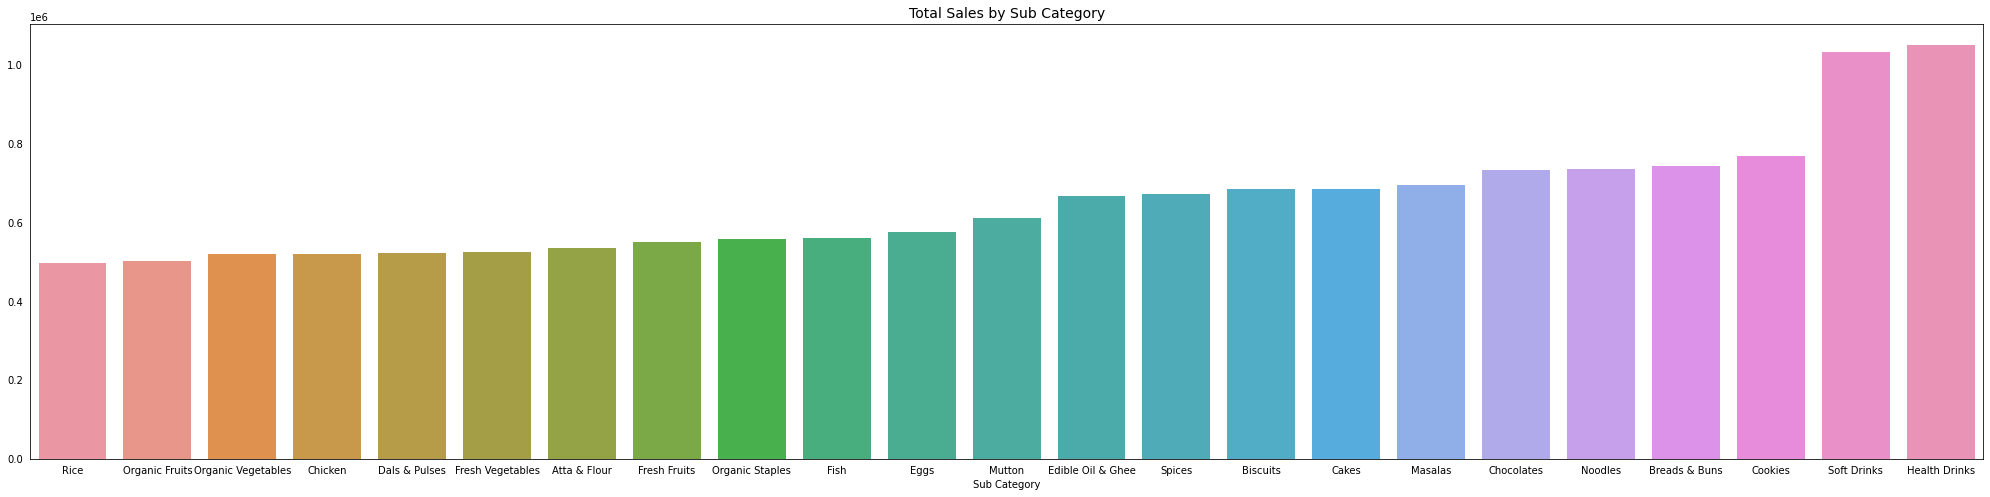

In [101]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (35,8)

# plotting the bar
sns.barplot(x = 'Sub Category', y = 'Sales', data = category)

# formatting the graph
plt.title('Total Sales by Sub Category', fontsize = 14)
plt.tick_params(left= False, bottom = False, labelbottom = True)
plt.ylabel(None)

plt.show()

# Total Order & Sales Each Year

In [102]:
year_sale = df.pivot_table(index = 'Order Year', values = ['Order ID', 'Sales', 'Profit'],
                           aggfunc = {'Order ID' : 'count', 'Sales' : 'sum', 'Profit' : 'sum'}).reset_index()
year_sale

,Order Year,Order ID,Profit,Sales
0,2015,1993,752529.11,2975599
1,2016,2102,797192.99,3131959
2,2017,2586,952814.94,3870658
3,2018,3312,1244182.88,4977512


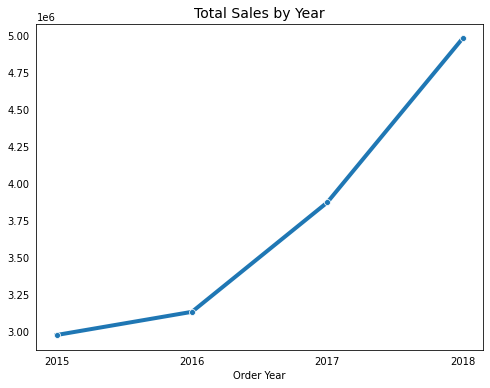

In [108]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (8,6)

# plotting the bar
sns.lineplot(x ='Order Year', y ='Sales', data = year_sale, linewidth=4, marker='o')

# formatting the graph
plt.title('Total Sales by Year', fontsize = 14)
plt.tick_params(left= False, bottom = False, labelbottom = True)
plt.ylabel(None)

plt.show()

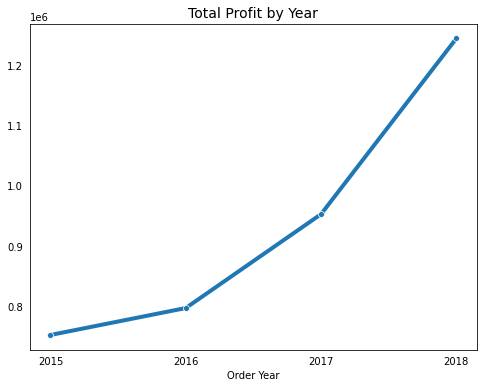

In [109]:
# fixing the graph size
plt.rcParams['figure.figsize'] = (8,6)

# plotting the bar
sns.lineplot(x ='Order Year', y ='Profit', data = year_sale, linewidth=4, marker='o')

# formatting the graph
plt.title('Total Profit by Year', fontsize = 14)
plt.tick_params(left= False, bottom = False, labelbottom = True)
plt.ylabel(None)

plt.show()

# Find the most loyal customer

In [113]:
customer = df.pivot_table(index = 'Customer Name', columns = 'Order Year', values='Order ID', aggfunc = 'count')
customer = customer[(customer['2015'] > 40) & (customer['2016'] > 40) & (customer['2017'] > 40) & (customer['2017'] > 40)]
customer 

Order Year,2015,2016,2017,2018
Customer Name,,,,
Alan,47,43,47,61
Amrish,51,52,59,65
Arutra,48,47,60,63
Arvind,50,41,46,66
Hussain,45,43,53,67
Jonas,41,41,46,70
Krithika,48,43,61,72
Malik,45,42,54,60
Ridhesh,41,44,50,69


# Find Category is Among The Top 3 Position in Sales, All The Years

In [115]:
sales_cat = df.pivot_table(index = 'Category', columns = 'Order Year', values = 'Sales', aggfunc = 'sum').reset_index()
sales_cat['2015_Rank'] = sales_cat['2015'].rank(method = 'max', ascending = False)
sales_cat['2016_Rank'] = sales_cat['2016'].rank(method = 'max', ascending = False)
sales_cat['2017_Rank'] = sales_cat['2017'].rank(method = 'max', ascending = False)
sales_cat['2018_Rank'] = sales_cat['2018'].rank(method = 'max', ascending = False)
sales_cat

Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
0,Bakery,433979,487965,504263,686074,3.0,1.0,7.0,6.0
1,Beverages,409091,425719,543575,706928,6.0,6.0,5.0,4.0
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0
3,Food Grains,356704,438736,609338,710494,7.0,4.0,1.0,3.0
4,Fruits & Veggies,409212,468441,516400,706674,5.0,2.0,6.0,5.0
5,Oil & Masala,423918,412725,562942,637603,4.0,7.0,4.0,7.0
6,Snacks,459713,436318,569039,772476,2.0,5.0,2.0,1.0


In [117]:
sales_cat[(sales_cat['2015_Rank'] <=3) & (sales_cat['2016_Rank'] <=3) & (sales_cat['2017_Rank'] <=3) & (sales_cat['2018_Rank'] <=3)]

Order Year,Category,2015,2016,2017,2018,2015_Rank,2016_Rank,2017_Rank,2018_Rank
2,"Eggs, Meat & Fish",482982,462055,565101,757263,1.0,3.0,3.0,2.0


# Find City Has The Most Order of Health Drink & Fresh Vegetable

In [127]:
health = df[(df['Sub Category'] == 'Health Drinks') | (df['Sub Category'] == 'Fresh Vegetables')]

health = df.pivot_table(index = 'City', values ='Order ID',
                              aggfunc = 'count').sort_values(by='Order ID', ascending = False)
health.head(5)

,Order ID
City,
Kanyakumari,459
Tirunelveli,446
Bodi,442
Krishnagiri,440
Vellore,434


# Conclution
There are several things to do to increase sales and provit, such:
1. For loyal customers, we can offer reward for a reward lottery to make them more loyal to us.
2. For non lotal customers, we can offer discount to make them interested in continuing to shop.
3. For several things that most ordered by city, like healthy drinks and fresh vegetables, we can offer them something like a package health drink, get free fresh vegetables.